# Big Data Analytics | Project - NYC Taxi Trip

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

#### Import the data 

In [2]:
df_jan = pd.read_parquet('C:\\Rafael_Bernardo\\Mestrado_Data_Science_AA_DS\\2_Semestre\\Big_Data_Analitycs\\Projeto\\Dados\\yellow_tripdata_2024-01.parquet', engine='pyarrow')
df_fev = pd.read_parquet('C:\\Rafael_Bernardo\\Mestrado_Data_Science_AA_DS\\2_Semestre\\Big_Data_Analitycs\\Projeto\\Dados\\yellow_tripdata_2024-02.parquet', engine='pyarrow')
df_mar = pd.read_parquet('C:\\Rafael_Bernardo\\Mestrado_Data_Science_AA_DS\\2_Semestre\\Big_Data_Analitycs\\Projeto\\Dados\\yellow_tripdata_2024-03.parquet', engine='pyarrow')

In [3]:
df_jan.head(3)
df_fev.head(3)
df_mar.head(3)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-03-01 00:18:51,2024-03-01 00:23:45,0.0,1.30,1.0,N,142,239,1,8.6,3.5,0.5,2.7,0.0,1.0,16.3,2.5,0.0
1,1,2024-03-01 00:26:00,2024-03-01 00:29:06,0.0,1.10,1.0,N,238,24,1,7.2,3.5,0.5,3.0,0.0,1.0,15.2,2.5,0.0
2,2,2024-03-01 00:09:22,2024-03-01 00:15:24,1.0,0.86,1.0,N,263,75,2,7.9,1.0,0.5,0.0,0.0,1.0,10.4,0.0,0.0


#### Concat the 3 months 

In [4]:
data_frames = [df_jan, df_fev, df_mar]

for e in data_frames:

    e['tpep_pickup_datetime'] = pd.to_datetime(e['tpep_pickup_datetime'])

    e['month_year'] = e['tpep_pickup_datetime'].dt.to_period('M')


In [5]:
df_all = pd.concat(data_frames, ignore_index=True)

In [6]:
df_all.head(5)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,month_year
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.7,1.0,0.5,0.00,0.0,1.0,22.70,2.5,0.0,2024-01
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.0,3.5,0.5,3.75,0.0,1.0,18.75,2.5,0.0,2024-01
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.3,3.5,0.5,3.00,0.0,1.0,31.30,2.5,0.0,2024-01
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.0,3.5,0.5,2.00,0.0,1.0,17.00,2.5,0.0,2024-01
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.9,3.5,0.5,3.20,0.0,1.0,16.10,2.5,0.0,2024-01


#### EDA 


In [7]:
# Number of rows and columns in the data set
print('Total Rows:', df_all.shape[0]) 
print('Total Columns:', df_all.shape[1])

Total Rows: 9554778
Total Columns: 20


In [8]:
df_all.columns 

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'congestion_surcharge', 'Airport_fee', 'month_year'],
      dtype='object')

In [9]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9554778 entries, 0 to 9554777
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int32         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int32         
 8   DOLocationID           int32         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  Airport_fee           

In [10]:
print(f'There are {df_all.duplicated().sum()} duplicates in the dataset.')

There are 1 duplicates in the dataset.


In [11]:
df_all.describe().T

,count,mean,min,25%,50%,75%,max,std
VendorID,9554778.0,1.756002,1.0,2.0,2.0,2.0,6.0,0.431242
tpep_pickup_datetime,9554778,2024-02-17 17:20:27.204719,2002-12-31 22:17:10,2024-01-26 09:55:41.250000,2024-02-18 15:38:32.500000,2024-03-11 11:59:11.750000,2024-04-01 00:34:55,NaN
tpep_dropoff_datetime,9554778,2024-02-17 17:36:34.800669,2002-12-31 22:42:24,2024-01-26 10:12:00.250000,2024-02-18 15:55:02.500000,2024-03-11 12:16:17,2024-04-02 18:08:46,NaN
passenger_count,8802816.0,1.33441,0.0,1.0,1.0,1.0,9.0,0.840925
trip_distance,9554778.0,4.042286,0.0,1.0,1.7,3.19,312722.3,265.478274
RatecodeID,8802816.0,2.1509,1.0,1.0,1.0,1.0,99.0,10.215182
PULocationID,9554778.0,165.203295,1.0,132.0,162.0,234.0,265.0,64.053302
DOLocationID,9554778.0,164.187514,1.0,114.0,162.0,234.0,265.0,69.408553
payment_type,9554778.0,1.121388,0.0,1.0,1.0,1.0,4.0,0.610608
fare_amount,9554778.0,18.325117,-999.0,8.6,12.8,20.5,9792.0,18.544965


#### Vizualization 

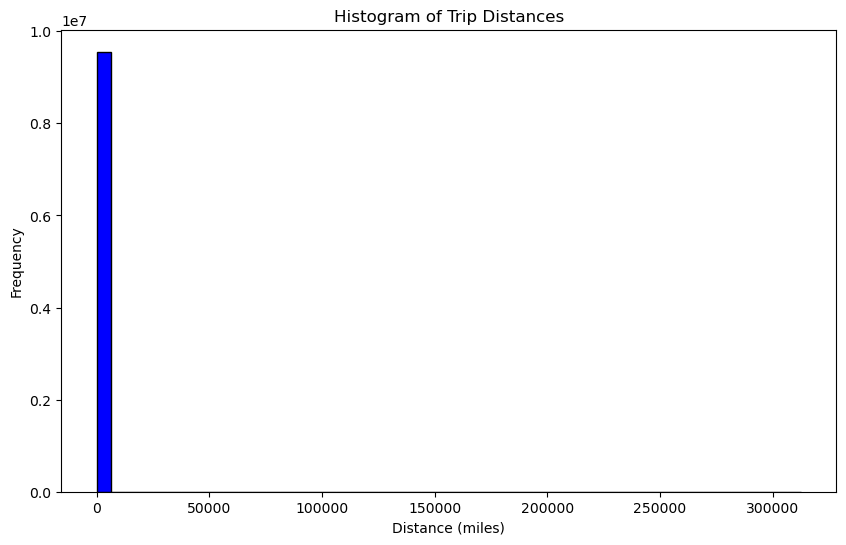

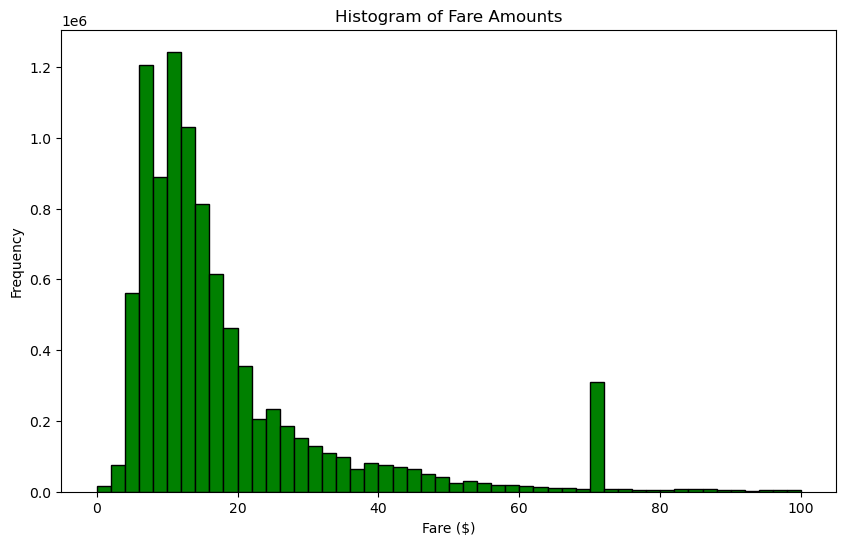

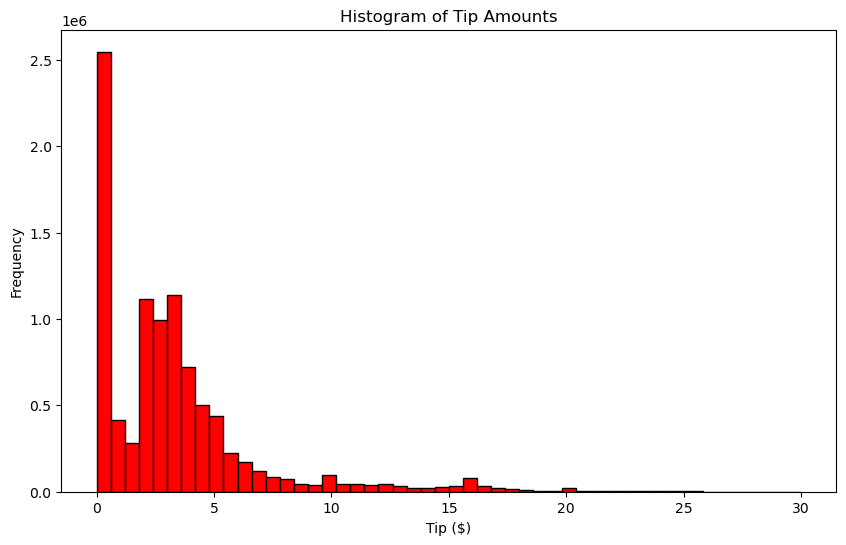

In [12]:

# Histogram of trip distances
plt.figure(figsize=(10, 6))
plt.hist(df_all['trip_distance'], bins=50, color='blue', edgecolor='black')
plt.title('Histogram of Trip Distances')
plt.xlabel('Distance (miles)')
plt.ylabel('Frequency')
plt.show()

# Histogram of fare amounts
plt.figure(figsize=(10, 6))
plt.hist(df_all['fare_amount'], bins=50, range=[0, 100], color='green', edgecolor='black')  # Limiting the range for better visualization
plt.title('Histogram of Fare Amounts')
plt.xlabel('Fare ($)')
plt.ylabel('Frequency')
plt.show()

# Histogram of tip amounts
plt.figure(figsize=(10, 6))
plt.hist(df_all['tip_amount'], bins=50, range=[0, 30], color='red', edgecolor='black')  # Limiting the range for better visualization
plt.title('Histogram of Tip Amounts')
plt.xlabel('Tip ($)')
plt.ylabel('Frequency')
plt.show()
